In [1]:
import json
from pathlib import Path

for treefn in Path('treeData/').glob("*.json"):
    with open(treefn) as f:
        tree = json.loads(f.read())
        break

In [18]:
from math import cos, sin
def rot(v, theta):
    theta = np.deg2rad(theta)
    mat = np.array([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])
    return np.dot(mat, v)

In [19]:
import numpy as np

In [116]:
SCALE = 0.5
CURL = 5

def unfurl(X, base_vector=np.array([0,1]), origin=np.array([0,0]), depth=None, cdepth=0):
    vs = []
    
    if 'children' not in X:
        return []
    
    if depth is not None:
        if cdepth >= depth:
            return []
    
    girls = [c for c in X['children'] if c['gender'] == 'woman']
    boys = [c for c in X['children'] if c['gender'] == 'man']
    
    #print(origin, base_vector)
    
    #print(len(girls), len(boys))
    
    for ci, c in enumerate(girls):
        #new_v = rot( base_vector, -CURL * (ci+1) )# / len(girls) )
        new_v = rot( base_vector, -CURL * (ci+1) / len(girls) )
        new_v = new_v * SCALE
        #print( np.power((new_v**2).sum(), 0.5) )

        vs.append( (origin, origin+new_v) )
        vs += unfurl(c, new_v, origin+new_v, depth, cdepth+1)

    for ci, c in enumerate(boys):
        #new_v = rot( base_vector, CURL * (ci+1) )# / len(boys) )
        new_v = rot( base_vector, CURL * (ci+1) / len(boys) )
        new_v = new_v * SCALE
        #print( np.power((new_v**2).sum(), 0.5) )

        vs.append( (origin, origin+new_v) )
        vs += unfurl(c, new_v, origin+new_v, depth, cdepth+1)
            
    return vs

In [112]:
from matplotlib import pyplot as plt

In [113]:
#unfurl(tree)

[0 0] [0 1]
[-0.6363961  0.6363961] [-0.6363961  0.6363961]
[-1.4463961  0.6363961] [-0.81  0.  ]
[-2.11990428  0.35741988] [-0.67350818 -0.27897622]
[-2.67932149  0.01460857] [-0.55941721 -0.34281131]
[-2.54600715 -0.14148247] [-0.42610286 -0.49890235]
[-3.13467686 -0.18781178] [-0.58866972 -0.04632931]
[-2.46271559 -0.20199733] [-0.34281131 -0.55941721]
[-2.55508858 -0.78521742] [-0.09237299 -0.58322009]
[-2.32486844 -0.77617205] [ 0.13784715 -0.57417471]
[-2.37098288 -0.24873748] [-0.2510786  -0.60615736]
[-2.69904155 -0.73971197] [-0.32805867 -0.49097449]
[-2.78852237 -0.66627696] [-0.41753948 -0.41753948]
[-2.91652451 -0.47470822] [-0.54554163 -0.22597074]
[-2.55345433 -0.81032684] [-0.18247145 -0.56158936]
[-2.46335587 -0.83195757] [-0.09237299 -0.58322009]
[-2.41731219 -0.8374072 ] [-0.04632931 -0.58866972]
[-2.32465357 -0.8374072 ] [ 0.04632931 -0.58866972]
[-2.27860989 -0.83195757] [ 0.09237299 -0.58322009]
[-2.23313573 -0.82291219] [ 0.13784715 -0.57417471]
[-2.18851144 -0.81

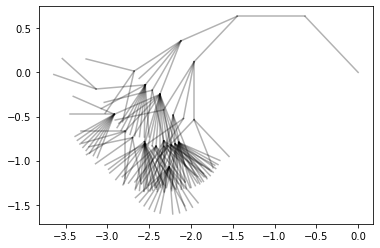

In [115]:
SCALE=0.9
CURL=45
for s, e in unfurl(tree, depth=None):
    plt.plot(
        [s[0],e[0]],
        [s[1],e[1]],
        color='black',
        alpha=0.3
    )

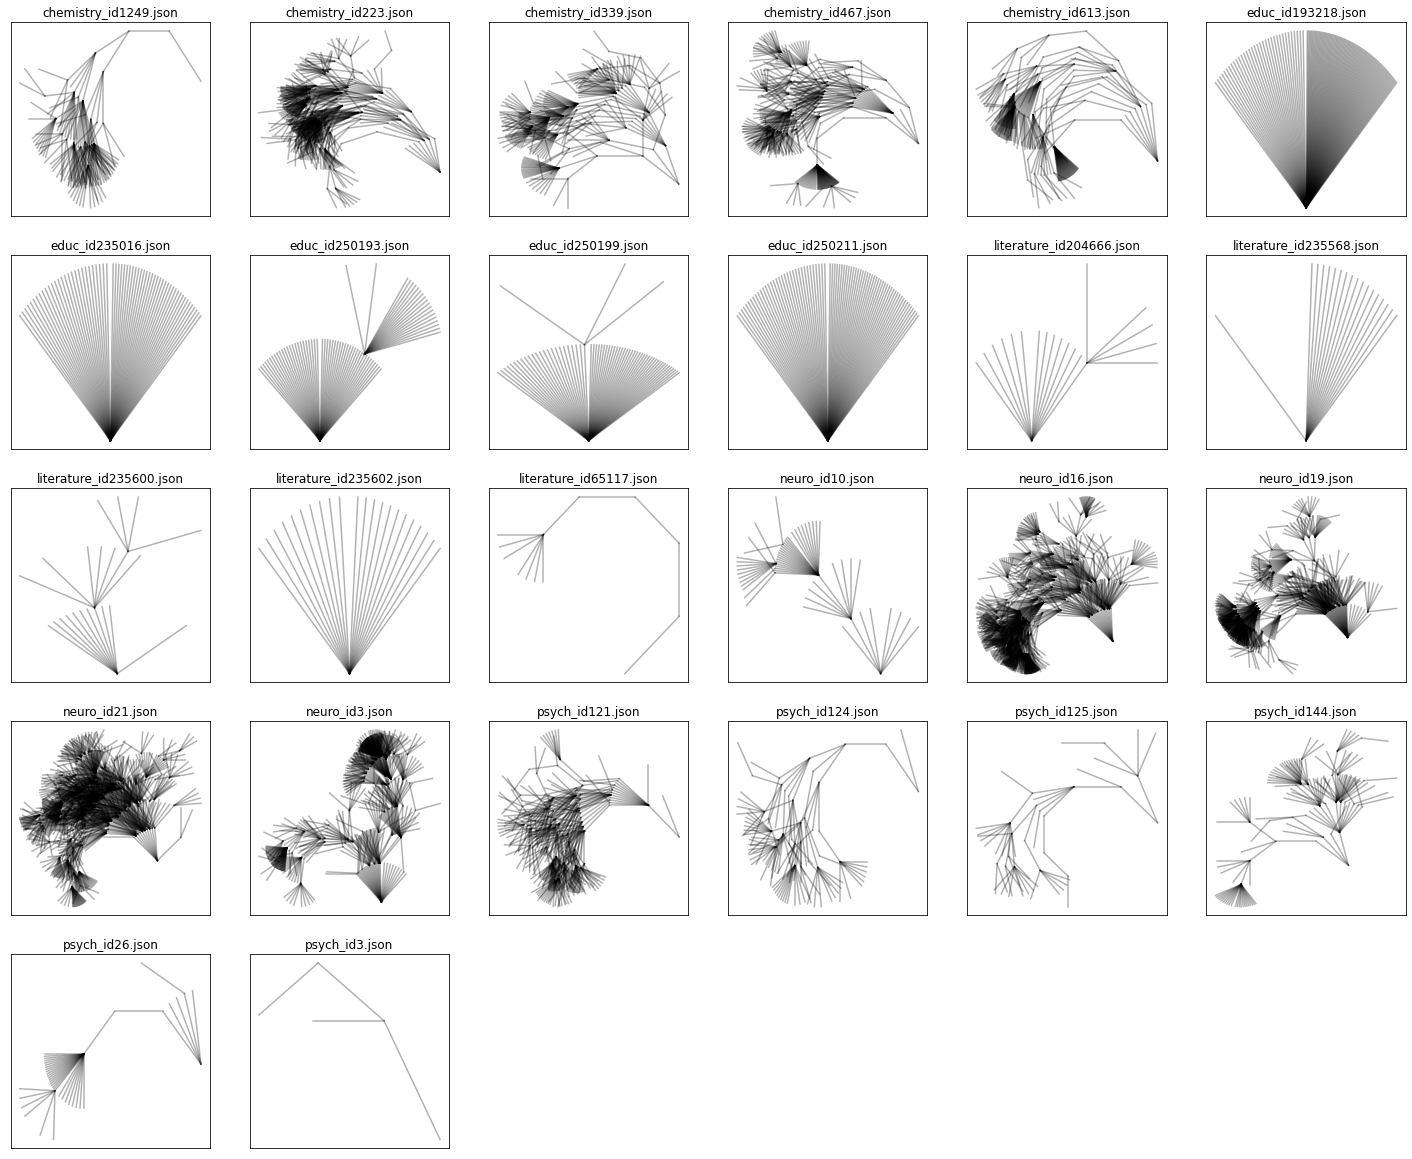

In [126]:
SCALE=0.9
CURL=45

fns = list(Path('treeData/').glob("*.json"))

plt.figure(figsize=(25,25))

for i, treefn in enumerate(fns):
    plt.subplot(6,6,i+1)
    with open(treefn) as f:
        tree = json.loads(f.read())
        for s, e in unfurl(tree, depth=None):
            plt.plot(
                [s[0],e[0]],
                [s[1],e[1]],
                color='black',
                alpha=0.3
            )
        plt.xticks([],[])
        plt.yticks([],[])
        plt.title(treefn.name)
        #plt.show()

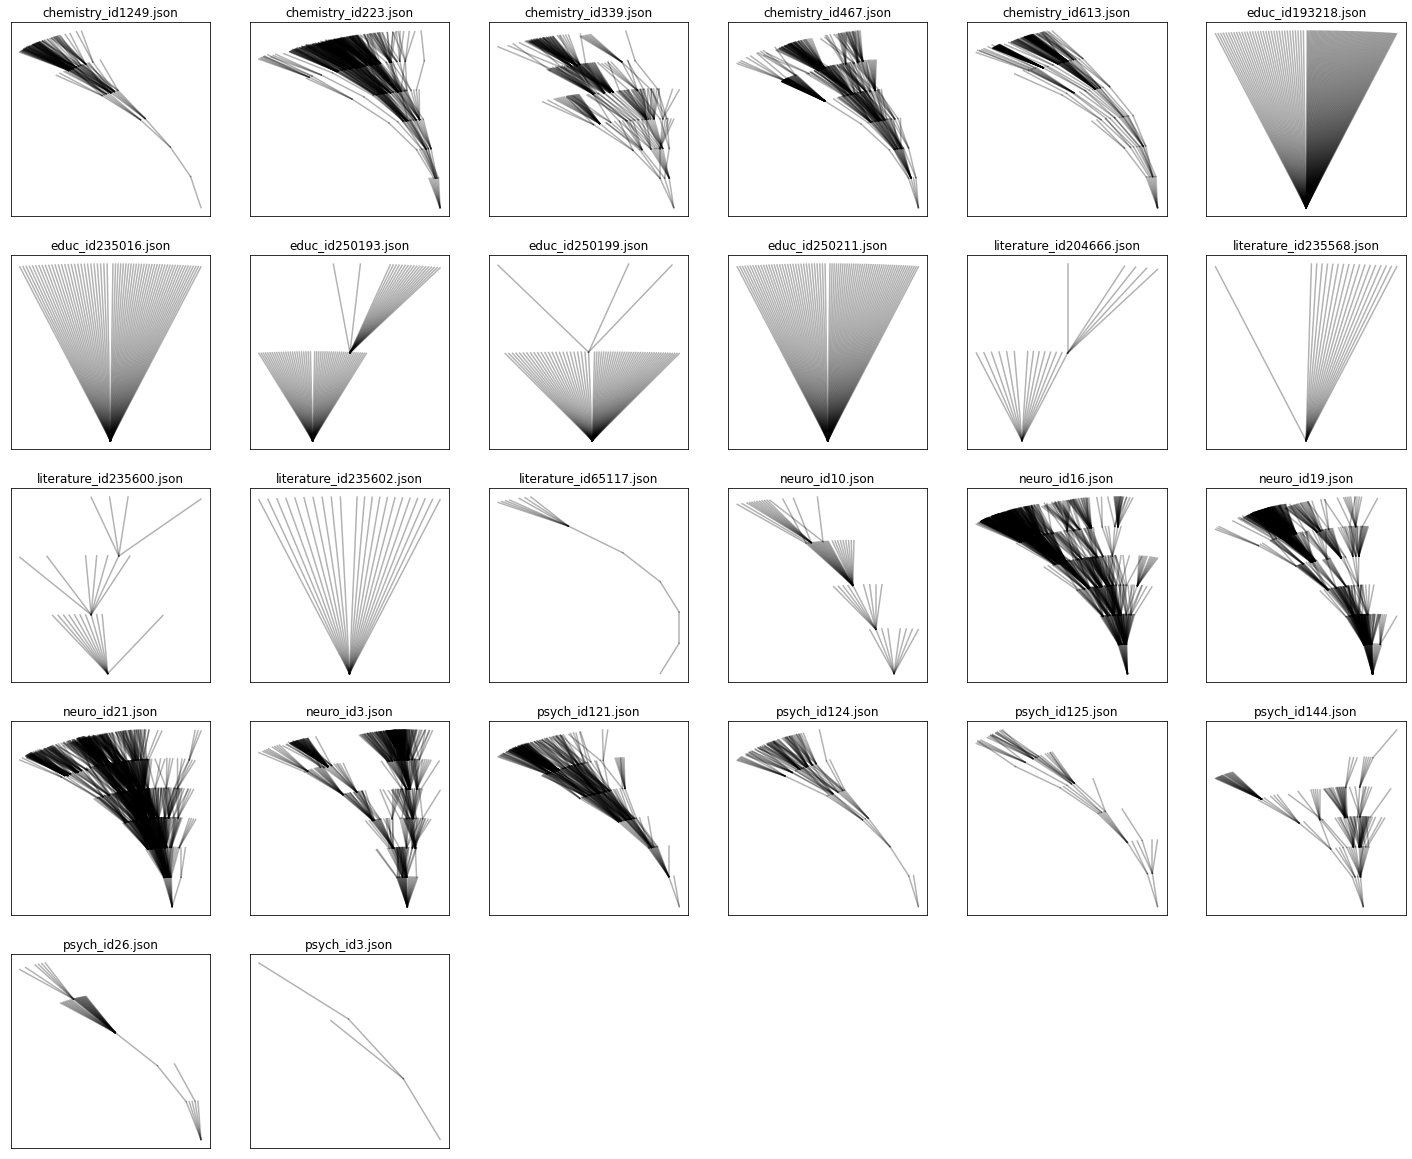

In [128]:
SCALE=1
CURL=10

fns = list(Path('treeData/').glob("*.json"))

plt.figure(figsize=(25,25))

for i, treefn in enumerate(fns):
    plt.subplot(6,6,i+1)
    with open(treefn) as f:
        tree = json.loads(f.read())
        for s, e in unfurl(tree, depth=None):
            plt.plot(
                [s[0],e[0]],
                [s[1],e[1]],
                color='black',
                alpha=0.3
            )
        plt.xticks([],[])
        plt.yticks([],[])
        plt.title(treefn.name)
        #plt.show()

In [146]:
SCALE = 0.5
CURL = 5

def unfurl2(X, base_vector=np.array([0,1]), origin=np.array([0,0]), depth=None, cdepth=0):
    vs = []
    
    if 'children' not in X:
        return []
    
    if depth is not None:
        if cdepth >= depth:
            return []
    
    girls = [c for c in X['children'] if c['gender'] == 'woman']
    boys = [c for c in X['children'] if c['gender'] == 'man']
    
    #print(origin, base_vector)
    
    #print(len(girls), len(boys))
    
    for ci, c in enumerate(girls):
        new_v = rot( base_vector, -CURL * (ci+1) )# / len(girls) )
        #new_v = rot( base_vector, -CURL * (ci+1) / len(girls) )
        new_v = new_v * SCALE
        #print( np.power((new_v**2).sum(), 0.5) )

        vs.append( (origin, origin+new_v) )
        vs += unfurl2(c, new_v, origin+new_v, depth, cdepth+1)

    for ci, c in enumerate(boys):
        new_v = rot( base_vector, CURL * (ci+1) )# / len(boys) )
        #new_v = rot( base_vector, CURL * (ci+1) / len(boys) )
        new_v = new_v * SCALE
        #print( np.power((new_v**2).sum(), 0.5) )

        vs.append( (origin, origin+new_v) )
        vs += unfurl2(c, new_v, origin+new_v, depth, cdepth+1)
            
    return vs

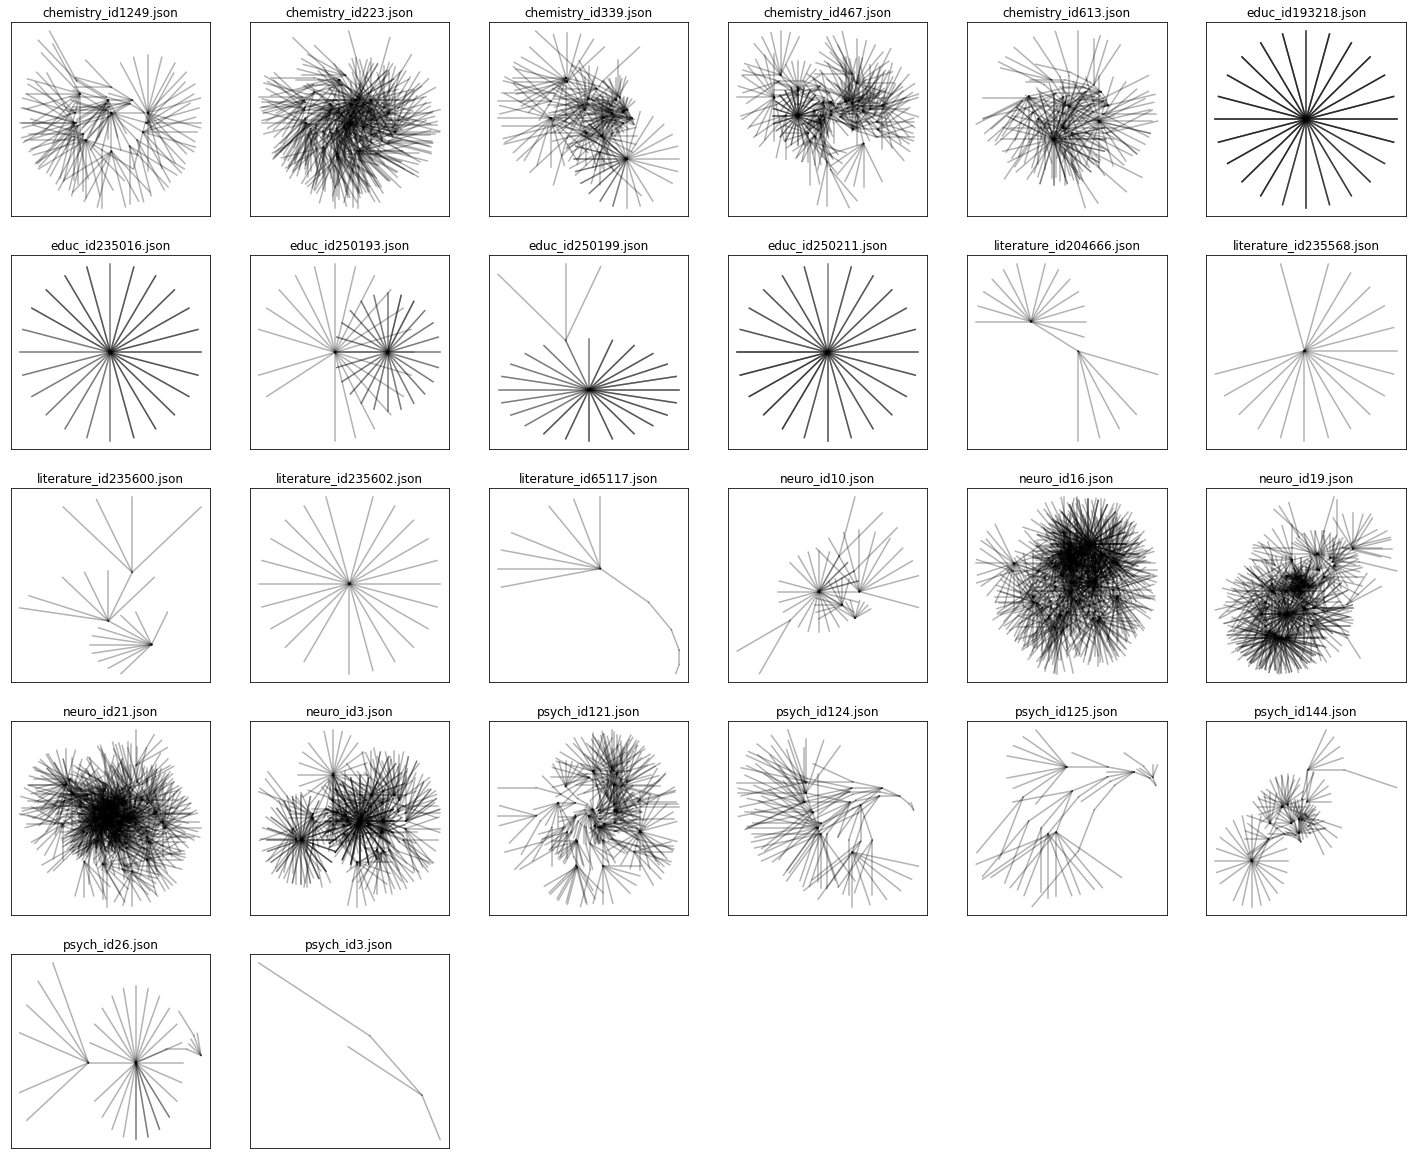

In [148]:
SCALE=1.5
CURL=15

fns = list(Path('treeData/').glob("*.json"))

plt.figure(figsize=(25,25))

for i, treefn in enumerate(fns):
    plt.subplot(6,6,i+1)
    with open(treefn) as f:
        tree = json.loads(f.read())
        for s, e in unfurl2(tree, depth=None):
            plt.plot(
                [s[0],e[0]],
                [s[1],e[1]],
                color='black',
                alpha=0.3
            )
        plt.xticks([],[])
        plt.yticks([],[])
        plt.title(treefn.name)
        #plt.show()

In [144]:
SCALE = 0.5
CURL = 5

def unfurl3(X, base_vector=np.array([0,1]), origin=np.array([0,0]), depth=None, cdepth=0):
    vs = []
    
    if 'children' not in X:
        return []
    
    if depth is not None:
        if cdepth >= depth:
            return []
    
    girls = [c for c in X['children'] if c['gender'] == 'woman']
    boys = [c for c in X['children'] if c['gender'] == 'man']
    
    #print(origin, base_vector)
    
    #print(len(girls), len(boys))
    
    for ci, c in enumerate(girls):
        #new_v = rot( base_vector, -CURL * (ci+1) )# / len(girls) )
        new_v = rot( base_vector, -CURL * (ci+1) / len(girls) )
        new_v = new_v * SCALE
        #print( np.power((new_v**2).sum(), 0.5) )

        vs.append( (origin, origin+new_v, c['researcharea_color']) )
        vs += unfurl3(c, new_v, origin+new_v, depth, cdepth+1)

    for ci, c in enumerate(boys):
        #new_v = rot( base_vector, CURL * (ci+1) )# / len(boys) )
        new_v = rot( base_vector, CURL * (ci+1) / len(boys) )
        new_v = new_v * SCALE
        #print( np.power((new_v**2).sum(), 0.5) )

        vs.append( (origin, origin+new_v, c['researcharea_color']) )
        vs += unfurl3(c, new_v, origin+new_v, depth, cdepth+1)
            
    return vs

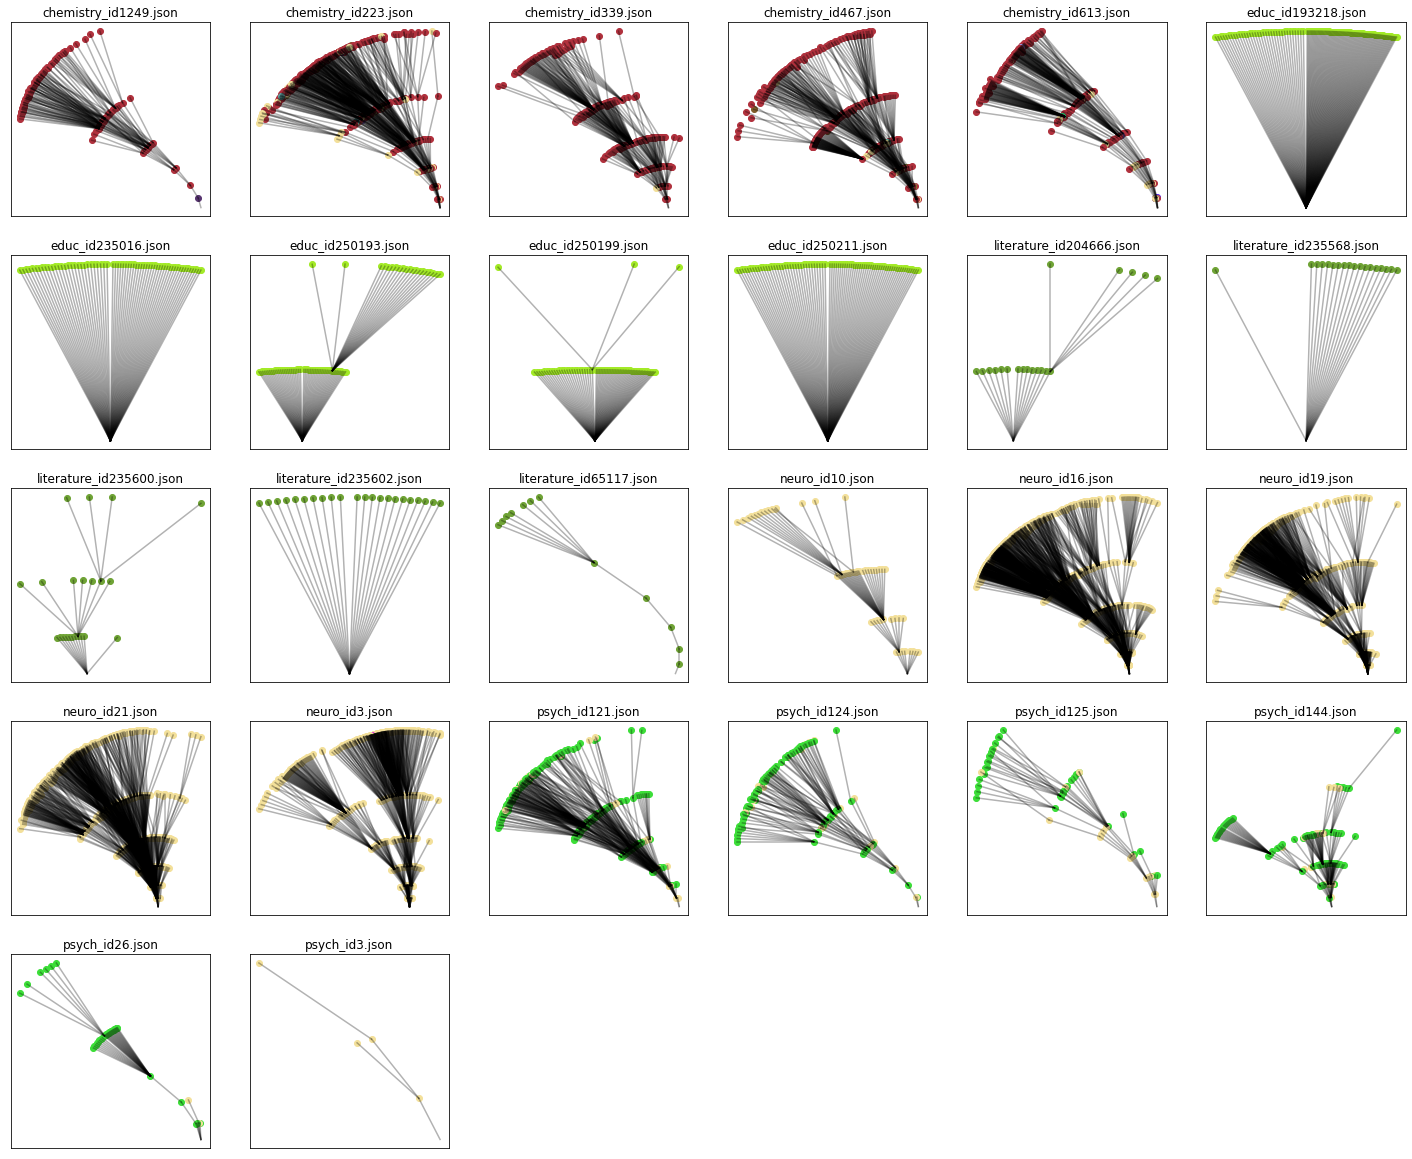

In [145]:
SCALE=1.5
CURL=15

fns = list(Path('treeData/').glob("*.json"))

plt.figure(figsize=(25,25))

for i, treefn in enumerate(fns):
    plt.subplot(6,6,i+1)
    with open(treefn) as f:
        tree = json.loads(f.read())
        for s, e, c in unfurl3(tree, depth=None):
            plt.plot(
                [s[0],e[0]],
                [s[1],e[1]],
                color='black',
                alpha=0.3
            )
            plt.scatter([e[0]], [e[1]], c=c)
        plt.xticks([],[])
        plt.yticks([],[])
        plt.title(treefn.name)
        #plt.show()